# Analyse unseres Datensatzes #

In [34]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import missingno as msno

In [19]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [20]:
# Load the latest version
ds = kagglehub.dataset_load(
  kagglehub.KaggleDatasetAdapter.PANDAS,
  "malaiarasugraj/global-health-statistics","Global Health Statistics.csv")


# Dimension des Datensatzes
print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

Anzahl Zeilen: 1000000
Anzahl Spalten: 22


In [21]:
# Erste 10 Zeilen
ds.head(10)

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,57.74,3.34,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,89.21,1.33,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,56.41,4.07,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,85.20,3.18,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,67.00,4.61,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14
5,Saudi Arabia,2011,Dengue,Bacterial,10.99,6.49,4.64,61+,Female,479234,98.41,3.50,0.62,Therapy,42671,Yes,93.17,416,9.83,29597,0.46,56.50
6,USA,2013,Malaria,Cardiovascular,18.42,6.33,9.33,61+,Female,289931,90.03,3.16,3.31,Surgery,15579,No,92.80,4535,0.89,60027,0.70,20.48
7,Nigeria,2007,Tuberculosis,Neurological,3.48,5.71,1.21,0-18,Female,393296,75.60,0.54,3.54,Medication,15744,Yes,65.45,4584,9.81,23222,0.46,66.49
8,Italy,2000,Rabies,Chronic,15.59,4.74,6.38,19-35,Female,253110,87.87,4.56,5.84,Therapy,7669,Yes,59.23,2253,9.92,30849,0.55,41.27
9,Australia,2006,Cholera,Chronic,10.12,2.08,6.00,61+,Male,174143,95.90,4.63,6.01,Medication,9468,Yes,93.21,4694,2.96,68856,0.90,83.30


In [22]:
# Infos über Spalten
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [23]:
# Deskriptive Stats für numerische Spalten
ds.describe()

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Population Affected,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Average Treatment Cost (USD),Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,500735.427363,74.987835,2.747929,5.245931,25010.313665,74.496934,2499.144809,5.002593,50311.099835,0.650069,54.985212
std,7.217287,5.740189,4.298947,2.859427,288660.116648,14.436345,1.299067,2.742865,14402.279227,14.155168,1443.923798,2.888298,28726.959359,0.144472,20.214042
min,2000.000000,0.100000,0.100000,0.100000,1000.000000,50.000000,0.500000,0.500000,100.000000,50.000000,1.000000,0.000000,500.000000,0.400000,20.000000
25%,2006.000000,5.090000,3.840000,2.580000,250491.250000,62.470000,1.620000,2.870000,12538.000000,62.220000,1245.000000,2.500000,25457.000000,0.530000,37.470000
50%,2012.000000,10.040000,7.550000,5.050000,501041.000000,75.000000,2.750000,5.240000,24980.000000,74.470000,2499.000000,5.000000,50372.000000,0.650000,54.980000
75%,2018.000000,15.010000,11.280000,7.530000,750782.000000,87.490000,3.870000,7.620000,37493.000000,86.780000,3750.000000,7.510000,75195.000000,0.780000,72.510000
max,2024.000000,20.000000,15.000000,10.000000,1000000.000000,100.000000,5.000000,10.000000,50000.000000,99.000000,5000.000000,10.000000,100000.000000,0.900000,90.000000


In [24]:
# Anzahl unique Werte pro Spalte
ds.nunique()

Country                                   20
Year                                      25
Disease Name                              20
Disease Category                          11
Prevalence Rate (%)                     1991
Incidence Rate (%)                      1491
Mortality Rate (%)                       991
Age Group                                  4
Gender                                     3
Population Affected                   632061
Healthcare Access (%)                   5001
Doctors per 1000                         451
Hospital Beds per 1000                   951
Treatment Type                             4
Average Treatment Cost (USD)           49901
Availability of Vaccines/Treatment         2
Recovery Rate (%)                       4901
DALYs                                   5000
Improvement in 5 Years (%)              1001
Per Capita Income (USD)                99498
Education Index                           51
Urbanization Rate (%)                   7001
dtype: int

# Beschreibung der einzelnen Spalten #

- *Country*: Name des Landes, in dem die Gesundheitsdaten erfasst wurden...
- *Year*: Jahr, in dem die Daten erhoben wurden.
- *Disease Name*: Name der Krankheit oder des Gesundheitszustands, der erfasst wurde.
- *Disease Category*: Kategorie der Krankheit (z. B. infektiös, nicht übertragbar).
- *Prevalence Rate*: Der Prozentsatz der von der Krankheit betroffenen Bevölkerung.
- *Inzidenzrate*: Der Prozentsatz der neuen oder neu diagnostizierten Fälle.
- *Mortality Rate*: Der Prozentsatz der betroffenen Bevölkerung, der an der Krankheit stirbt.
- *Age Group*: Die Altersgruppe, die am stärksten von der Krankheit betroffen ist.
- *Gender*: Das/die von der Krankheit betroffene(n) Geschlecht(e) (männlich, weiblich, beide).
- *Population Affected*: Die Gesamtzahl der von der Krankheit betroffenen Personen.
- *Healthcare Access*: Der Prozentsatz der Bevölkerung mit Zugang zu Gesundheitsversorgung.
- *Doctors per 1000*: Die Anzahl der Ärzte pro 1000 Einwohner.
- *Hospital Beds per 1000*: Die Anzahl der verfügbaren Krankenhausbetten pro 1000 Einwohner.
- *Treatment Type*: Die primäre Behandlungsmethode für die Krankheit (z. B. Medikamente, Operation).
- *Average Treatment Cost*: Die durchschnittlichen Kosten für die Behandlung der Krankheit in USD.
- *Availabilty of Vaccines/Treatment*: Ob Impfstoffe oder Behandlungen verfügbar sind.
- *Recovery Rate*: Der Prozentsatz der Menschen, die sich von der Krankheit erholen.
- *DALYs*: Disability-Adjusted Life Years (behinderungsbereinigte Lebensjahre), ein Maß für die Krankheitslast.
- *Improvement in 5 Years*: Die Verbesserung der Krankheitsverläufe in den letzten fünf Jahren.
- *Per Capita Income*: Das durchschnittliche Einkommen pro Person im Land in USD.
- *Education Index*: Das durchschnittliche Bildungsniveau im Land.
- *Urbanization Rate*: Der Prozentsatz der Bevölkerung, der in städtischen Gebieten lebt.

In [25]:
# Eindeutige Wert der kategorischen Variablen

print(f"Country: {ds["Country"].unique()}\n")
print(f"Disease Name: {ds["Disease Name"].unique()}\n")
print(f"Disease Category: {ds["Disease Category"].unique()}\n")
print(f"Age Group: {ds["Age Group"].unique()}\n")
print(f"Gender: {ds["Gender"].unique()}\n")
print(f"Treatment Type: {ds["Treatment Type"].unique()}\n")
print(f"Availability of Vaccines/Treatment: {ds["Availability of Vaccines/Treatment"].unique()}\n")

Country: ['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']

Disease Name: ['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']

Disease Category: ['Respiratory' 'Parasitic' 'Genetic' 'Autoimmune' 'Bacterial'
 'Cardiovascular' 'Neurological' 'Chronic' 'Metabolic' 'Infectious'
 'Viral']

Age Group: ['0-18' '61+' '36-60' '19-35']

Gender: ['Male' 'Other' 'Female']

Treatment Type: ['Medication' 'Surgery' 'Vaccination' 'Therapy']

Availability of Vaccines/Treatment: ['No' 'Yes']



Messniveaus der kategorischen Spalten:
- Country: Nominal (da es eine reine Zuweisung einer Kategorie ohne Ordnung ist)
- Disease Name: Nominal (da es eine reine Zuweisung einer Kategorie ohne Ordnung ist)
- Disease Category: Nominal (da es eine reine Zuweisung einer Kategorie ohne Ordnung ist)
- Age Group: Ordinal (Zuweisung einer Kategorie mit Rangfolge - von jungem bis hohem Alter)
- Gender: Nominal (da es eine reine Zuweisung einer Kategorie ohne Ordnung ist)
- Treatment Type: Nominal (da es eine reine Zuweisung einer Kategorie ohne Ordnung ist)
- Availability of Vaccines/Treatment: Nominal (da es eine reine Zuweisung einer Kategorie ohne Ordnung ist)

Messniveaus der numerischen Spalten:
- Year: Ordinal
- Prevalence Rate (%): Ratio
- Incidence Rate (%): Ratio
- Mortality Rate (%): Ratio
- Population affected: Ratio
- Healthcare Access (%): Ratio
- Doctors per 1000: Ratio
- Hospital beds per 1000: Ratio
- Average Treatment cost (USD): Ratio
- Recovery rate (%): Ratio
- DALYs: Ratio
- Improvement in 5 years (%): Ratio
- Per Capita Income (USD): Ratio
- Education Index: Interval
- Urbanization Rate (%): Ratio

# Missing Values #

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


<Axes: >

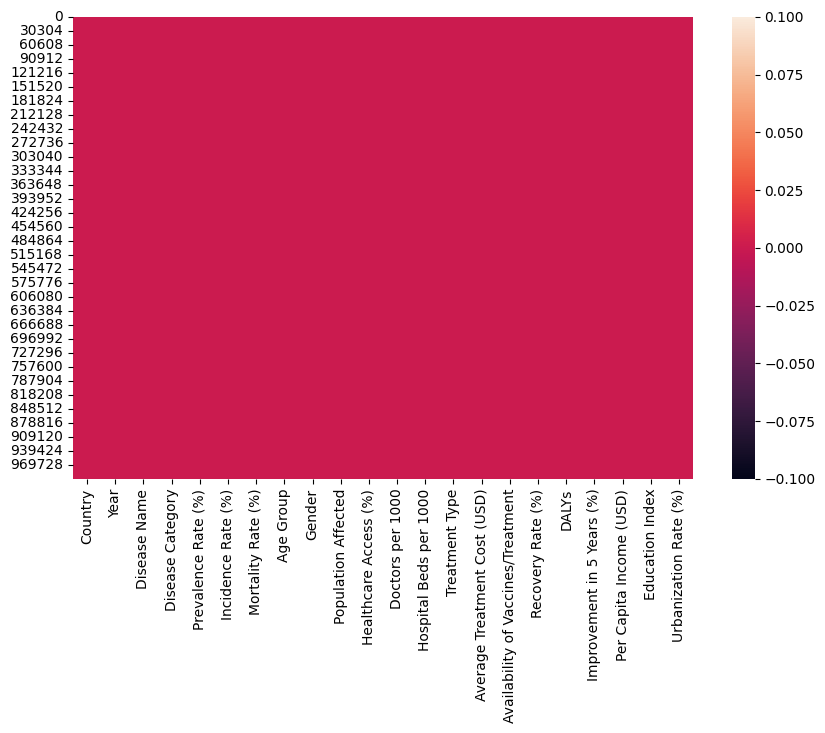

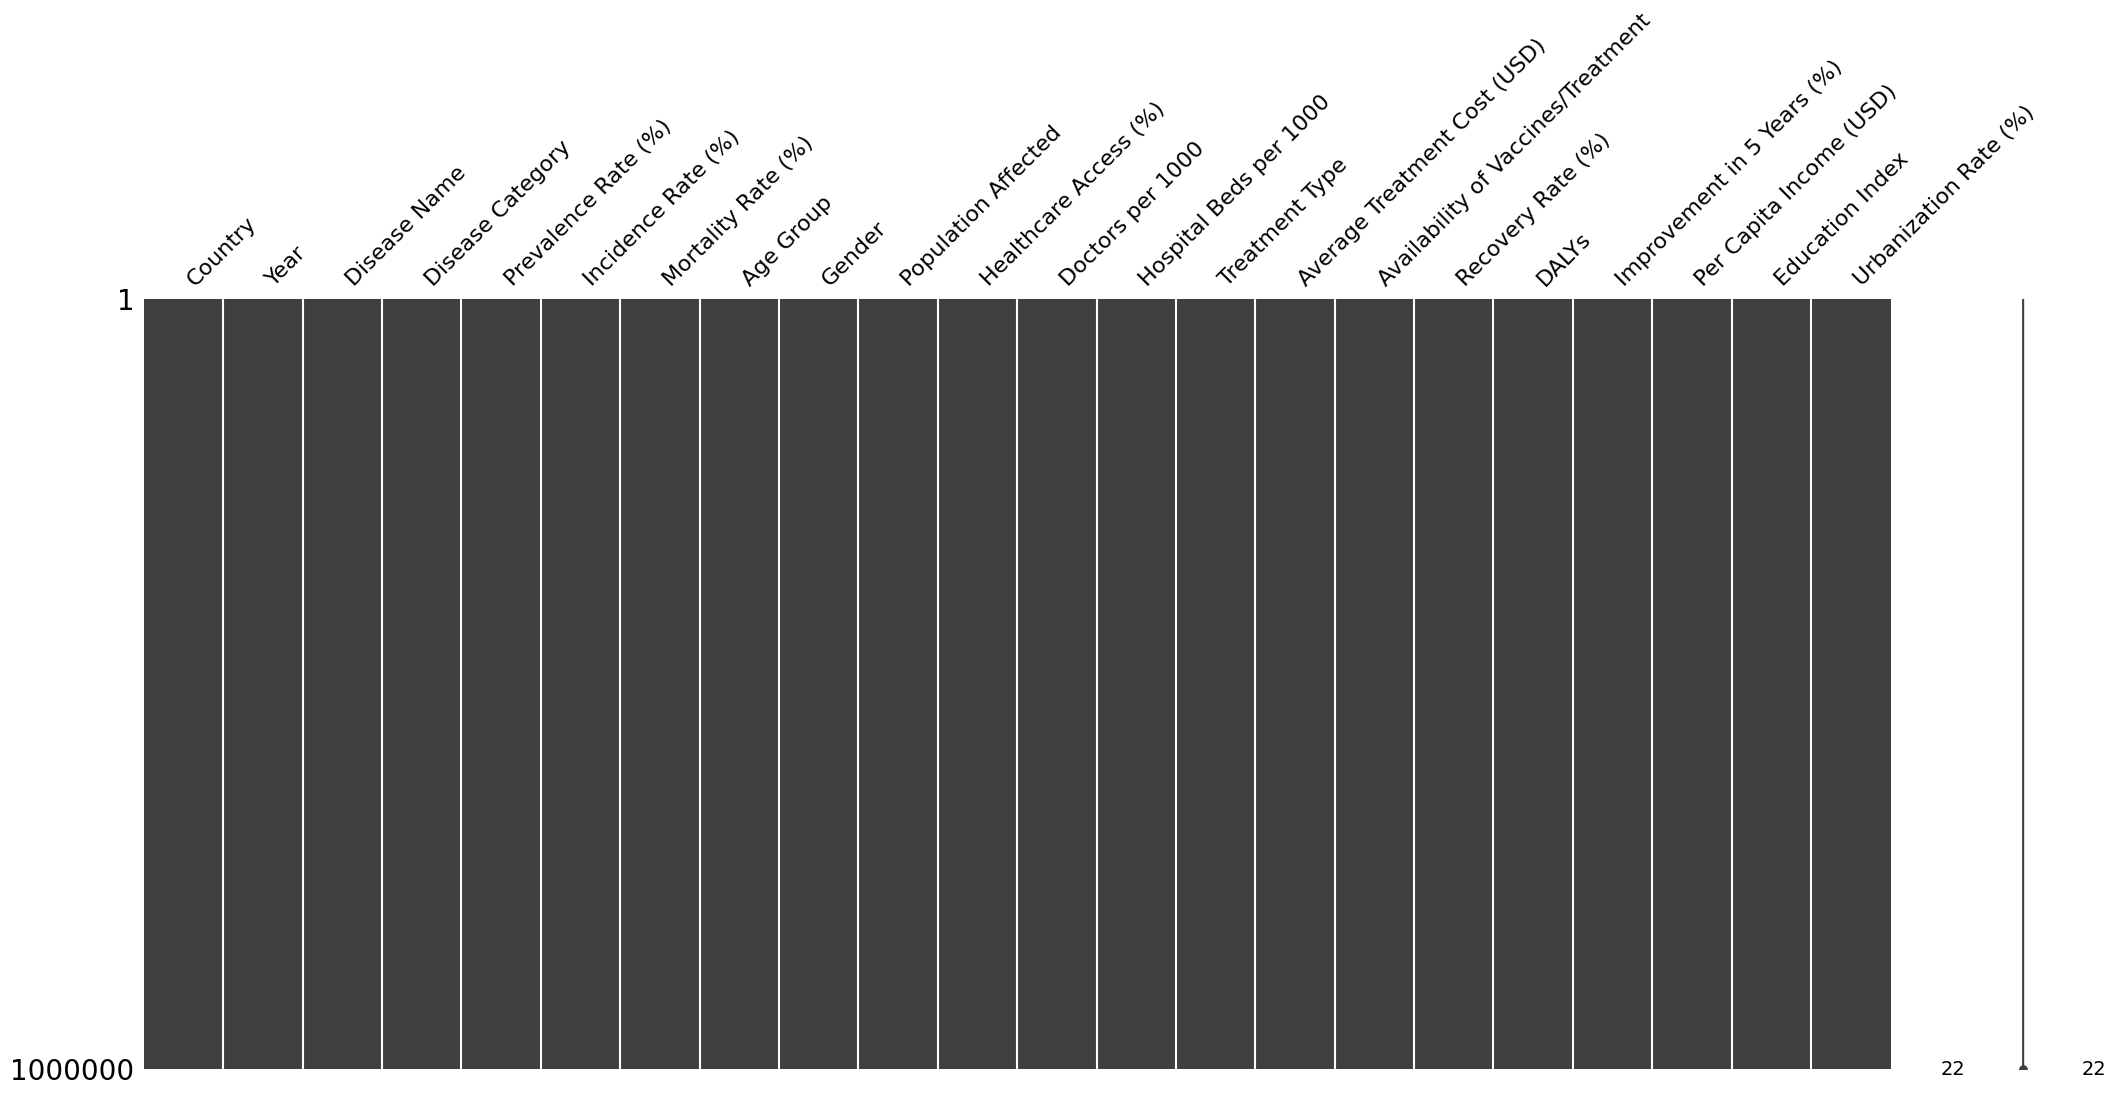

In [58]:
sns.heatmap(ds.isnull())

print(ds.isna().sum())

msno.matrix(ds)

In unserem Datensatz existieren keine Missing Values. Mit der Überprüfung von oben (isna()) und der Darstellung in der Heatmap sieht man dies sehr gut.

Wir benötigen also keine Methoden um die fehlenden Datenarten (MCAR, MAR oder MNAR) zu ergänzen.

# Bias #


### Sampling Bias ###
Sampling Bias entsteht, wenn die Stichprobe (die Daten, die man hat) nicht repräsentativ für die Grundgesamtheit ist.
Das heißt: bestimmte Gruppen sind überrepräsentiert (zu oft) oder unterrepräsentiert (zu selten).

In [46]:
# Repräsentation nach Jahr & Land
countries_per_year = ds.groupby("Year")["Country"].nunique()
years_per_country = ds.groupby("Country")["Year"].nunique()

# Repräsentation weiterer Schlüssel-Attribute
sampling_age = ds["Age Group"].value_counts(normalize=True).sort_index() * 100
sampling_gender = ds["Gender"].value_counts(normalize=True) * 100
sampling_category = ds["Disease Category"].value_counts(normalize=True) * 100

print("Countries per Year: min/max =", countries_per_year.min(), countries_per_year.max())
print("Years per Country: min/max =", years_per_country.min(), years_per_country.max())
print("\nAge Group (%):\n", sampling_age.round(2).to_dict())
print("\nGender (%):\n", sampling_gender.round(2).to_dict())
print("\nDisease Category min/max gap (pp):", float(sampling_category.max() - sampling_category.min()))

Countries per Year: min/max = 20 20
Years per Country: min/max = 25 25

Age Group (%):
 {'0-18': 24.96, '19-35': 25.12, '36-60': 24.92, '61+': 25.0}

Gender (%):
 {'Male': 33.37, 'Female': 33.32, 'Other': 33.31}

Disease Category min/max gap (pp): 0.08870000000000111


Schlussfoglerungen:
- Countries per Year: vollständig und gleichmäßig.
- Age Group ~ { ‘0-18’: 24.96, ‘19-35’: 25.12, ‘36-60’: 24.92, ‘61+’: 25.00 }% → sehr balanciert/alle Gruppen sind gleichmässig vertreten
- Gender: 1/3 der Geschlechter sind "other". "Other" wird hier als Sammelkategorie verwendet:
    - Personen, die sich nicht eindeutig als Male oder Female einordnen (non-binary, diverse, intersex, etc.).
    - Fälle, in denen kein Geschlecht angegeben wurde oder es nicht erhoben werden konnte.
- Disease Category: Der Gap gibt die Differenz zwischen dem höchsten und niedrigsten relativen Anteil (%) der Krankheitskategorien an. Da dieser Gap sehr klein ist, ist die Disease Category beinahe perfekt ausgeglichen.


Hinweis zur Kategorie *Other* bei Geschlecht:
Im Datensatz gibt es neben *Male* und *Female* auch die Kategorie **Other**.  
Diese Kategorie dient offenbar als **Sammelbegriff** für alle Personen, die sich nicht in die binären Geschlechter einordnen lassen (z. B. non-binary, diverse, intersex) oder für Fälle, in denen das Geschlecht nicht erhoben wurde.  
Da die Verteilung der Geschlechter in den Daten nahezu **gleichmäßig** ist (*Male ~33.4 %*, *Female ~33.3 %*, *Other ~33.3 %*), handelt es sich sehr wahrscheinlich um eine **synthetische Konstruktion** des Datensatzes, die künstlich Balance herstellt.  


### Survivorship Bias
Survivorship Bias bedeutet: Wir sehen nur Länder, Krankheiten oder Gruppen, die über lange Zeiträume „überlebt“ haben, während andere verschwinden oder nur teilweise vertreten sind.

In [50]:
# Schritt 1: Spannweite der Jahre bestimmen
min_year, max_year = ds["Year"].min(), ds["Year"].max()
full_span = (max_year - min_year + 1)

# Schritt 2: Abdeckung für Länder berechnen
years_per_country = ds.groupby("Country")["Year"].nunique()
coverage_ratio_country = years_per_country / full_span

# Schritt 3: Abdeckung für Krankheiten berechnen
years_per_disease = ds.groupby("Disease Name")["Year"].nunique()
coverage_ratio_disease = years_per_disease / full_span

# Schritt 4: Kennzahlen ausgeben
print("Country coverage: min/max =", float(coverage_ratio_country.min()), float(coverage_ratio_country.max()))
print("Countries <80% coverage (%):", float((coverage_ratio_country < 0.8).mean()*100))

print("Disease coverage: min/max =", float(coverage_ratio_disease.min()), float(coverage_ratio_disease.max()))
print("Diseases <80% coverage (%):", float((coverage_ratio_disease < 0.8).mean()*100))

Country coverage: min/max = 1.0 1.0
Countries <80% coverage (%): 0.0
Disease coverage: min/max = 1.0 1.0
Diseases <80% coverage (%): 0.0


- Country Coverage: alle Länder tauchen in jedem Jahr auf
- Countries <80% coverage: Kein Land fehlt in einem signifikanten Teil der Jahre.
- Disease coverage: Alle Krankheiten sind ebenfalls in jedem Jahr vertreten.
- Diseases <80% coverage: Keine Krankheit verschwindet oder taucht nur selektiv auf.

### Confirmation Bias
Confirmation Bias bedeutet: Daten oder Ergebnisse werden so ausgewählt, interpretiert oder dargestellt, dass sie die vorhandene Erwartung oder Hypothese bestätigen.

In [51]:
# 1. Verteilung Gender × Disease Category
gender_disease = (
    ds.groupby(["Disease Category","Gender"])
      .size()
      .unstack(fill_value=0)
)

print("Gender × Disease Category Verteilung (erste 10 Kategorien):")
print(gender_disease.head(10))

# 2. Normalisierte Verteilung (Anteile pro Disease Category)
gender_disease_pct = gender_disease.div(gender_disease.sum(axis=1), axis=0) * 100
print("\nAnteile pro Disease Category (%):")
print(gender_disease_pct.round(2).head(10))

# 3. Variabilität innerhalb der Kategorien
std_across_gender = gender_disease_pct.std(axis=1)
print("\nStandardabweichung der Gender-Verteilung pro Disease Category (erste 10):")
print(std_across_gender.head(10))

print("\nDurchschnittliche Std-Abweichung (Gender-Verteilung über alle Kategorien):", std_across_gender.mean())

# 4. Dasselbe für Age Group
age_disease = (
    ds.groupby(["Disease Category","Age Group"])
      .size()
      .unstack(fill_value=0)
)
age_disease_pct = age_disease.div(age_disease.sum(axis=1), axis=0) * 100
std_across_age = age_disease_pct.std(axis=1)
print("\nDurchschnittliche Std-Abweichung (Age Group-Verteilung über alle Kategorien):", std_across_age.mean())

Gender × Disease Category Verteilung (erste 10 Kategorien):
Gender            Female   Male  Other
Disease Category                      
Autoimmune         30477  30404  30272
Bacterial          30161  30404  29944
Cardiovascular     30263  30565  30140
Chronic            30133  30235  30077
Genetic            30345  30376  30432
Infectious         30434  30239  30091
Metabolic          30549  30225  30558
Neurological       30265  30148  30587
Parasitic          30540  30333  30305
Respiratory        30164  30204  30220

Anteile pro Disease Category (%):
Gender            Female   Male  Other
Disease Category                      
Autoimmune         33.43  33.35  33.21
Bacterial          33.32  33.59  33.08
Cardiovascular     33.27  33.60  33.13
Chronic            33.32  33.43  33.25
Genetic            33.29  33.32  33.39
Infectious         33.53  33.32  33.15
Metabolic          33.45  33.09  33.46
Neurological       33.26  33.13  33.61
Parasitic          33.49  33.27  33.24
Respirat

Bei Gender × Disease Category und Age Group × Disease Category zeigt sich:
- Die Verteilungen sind extrem gleichmäßig (Male, Female, Other fast identisch verteilt).
- Die Standardabweichung innerhalb jeder Kategorie ist extrem niedrig (nahe 0).
- Das ist in echten Gesundheitsdaten unrealistisch, da bestimmte Krankheiten i. d. R. stark alters- oder geschlechtsspezifisch sind (z. B. Prostata-Krebs nur bei Männern, viele Infektionskrankheiten häufiger bei Kindern).

Das spricht für einen Confirmation Bias im Datensatz:
- Die Daten wurden offenbar so konstruiert, dass sie eine gewünschte Hypothese bestätigen: „Alle Krankheiten betreffen Altersgruppen und Geschlechter gleichmäßig“.
- Dadurch wirkt der Datensatz „zu perfekt“ und verliert realistische Variabilität.


Bei der Analyse fällt auf, dass Altersgruppen, Geschlechter und Krankheitskategorien im Datensatz nahezu perfekt gleichmäßig verteilt sind. In realen Gesundheitsdaten wären deutliche Unterschiede zu erwarten, da viele Krankheiten alters- oder geschlechtsspezifisch auftreten.  

Dies deutet darauf hin, dass der Datensatz **absichtlich balanciert** wurde. Er wirkt so konstruiert, dass er eine „erwartete Realität“ bestätigt, in der alle Gruppen gleichmäßig betroffen sind.  

-> Wahrscheinlich wurde der Datensatz für **Lehr- und Übungszwecke** erstellt, um statistische Auswertungen zu erleichtern und typische Datenprobleme (ungleiche Verteilungen, Ausreißer, fehlende Werte) zu vermeiden.  

### Publication Bias
Publication Bias entsteht, wenn bestimmte Ergebnisse oder Phänomene bevorzugt veröffentlicht oder dokumentiert werden, während andere unterrepräsentiert sind.  

In [53]:
# Anteile Krankheitskategorien (%)
cat_share = ds["Disease Category"].value_counts(normalize=True) * 100
print("Disease Category (%):")
print(cat_share.round(2).head(20))

# Anteile Krankheiten (%)
dis_share = ds["Disease Name"].value_counts(normalize=True) * 100
print("\nDisease Name (%):")
print(dis_share.round(2).head(20))

# Gini-Koeffizienten zur Ungleichverteilung
import numpy as np
def gini(p):
    p = np.asarray(p, dtype=float)
    p = p[p > 0]
    if len(p) == 0:
        return 0.0
    p = np.sort(p)
    n = len(p)
    cum = np.cumsum(p)
    return (n + 1 - 2 * (cum / cum[-1]).sum()) / n

# Größte DiseaseCategory × Gender-Kombination
combo = ds.groupby(["Disease Category","Gender"]).size()
max_combo_pct = (combo.max() / len(ds)) * 100
print("\nGrößte Category×Gender-Kombination (%):", round(max_combo_pct, 3))

Disease Category (%):
Disease Category
Metabolic         9.13
Parasitic         9.12
Genetic           9.12
Autoimmune        9.12
Neurological      9.10
Cardiovascular    9.10
Viral             9.09
Infectious        9.08
Respiratory       9.06
Bacterial         9.05
Chronic           9.04
Name: proportion, dtype: float64

Disease Name (%):
Disease Name
COVID-19               5.04
Zika                   5.03
Dengue                 5.03
Cancer                 5.03
HIV/AIDS               5.03
Cholera                5.02
Asthma                 5.01
Leprosy                5.01
Diabetes               5.00
Rabies                 5.00
Hepatitis              5.00
Polio                  5.00
Malaria                4.99
Influenza              4.99
Tuberculosis           4.99
Alzheimer's Disease    4.98
Measles                4.97
Parkinson's Disease    4.97
Ebola                  4.97
Hypertension           4.94
Name: proportion, dtype: float64

Größte Category×Gender-Kombination (%): 3.059


Im vorliegenden Datensatz zeigt sich, dass **alle Krankheitskategorien und Krankheiten nahezu gleich häufig vertreten sind** (Anteile zwischen ca. 5–9 %).  
Selbst die größte Kombination *Disease Category × Gender* macht nur etwa **3 %** aller Einträge aus.  

-> Es gibt keinen echten Publication Bias. Stattdessen wurde der Datensatz offenbar absichtlich balanciert konstruiert, um eine gleichmäßige Abdeckung zu gewährleisten. 


### Measurement Bias
Measurement Bias (Messfehler-Bias) entsteht, wenn die Erhebungsmethode, das Messinstrument oder die Datenverarbeitung systematisch falsche oder verzerrte Werte liefert.

In [56]:
# Plausible Wertebereiche definieren
plausible_ranges = {
    "Prevalence Rate (%)": (0, 100),
    "Incidence Rate (%)": (0, 100),
    "Mortality Rate (%)": (0, 100),
    "Recovery Rate (%)": (0, 100),
    "Healthcare Access (%)": (0, 100),
    "Education Index": (0, 1),
    "Urbanization Rate (%)": (0, 100),
    "Doctors per 1000": (0, np.inf),
    "Hospital Beds per 1000": (0, np.inf),
    "Average Treatment Cost (USD)": (0, np.inf),
    "Per Capita Income (USD)": (0, np.inf),
    "DALYs": (0, np.inf),
    "Improvement in 5 Years (%)": (-100, 100),
}

# Analyse: min, max, Werte außerhalb plausibler Range, Ausreißer >3σ, Missing %
measurement_report = {}
for col, (lo, hi) in plausible_ranges.items():
    if col in ds.columns:
        s = pd.to_numeric(ds[col], errors="coerce")
        oob = int(((s < lo) | (s > hi)).sum())
        z = (s - s.mean()) / s.std(ddof=0)
        outliers = int((np.abs(z) > 3).sum())
        measurement_report[col] = {
            "min": float(np.nanmin(s)),
            "max": float(np.nanmax(s)),
            "out_of_bounds": oob,
            "missing_pct": float(s.isna().mean()*100)
        }

pd.DataFrame(measurement_report).T

,min,max,out_of_bounds,missing_pct
Prevalence Rate (%),0.1,20.0,0.0,0.0
Incidence Rate (%),0.1,15.0,0.0,0.0
Mortality Rate (%),0.1,10.0,0.0,0.0
Recovery Rate (%),50.0,99.0,0.0,0.0
Healthcare Access (%),50.0,100.0,0.0,0.0
Education Index,0.4,0.9,0.0,0.0
Urbanization Rate (%),20.0,90.0,0.0,0.0
Doctors per 1000,0.5,5.0,0.0,0.0
Hospital Beds per 1000,0.5,10.0,0.0,0.0
Average Treatment Cost (USD),100.0,50000.0,0.0,0.0


Alle geprüften Variablen (z. B. Prevalence, Incidence, Mortality, Recovery, Healthcare Access, Education Index, Urbanization) liegen innerhalb plausibler Wertebereiche.
- Es gibt keine Werte außerhalb der definierten Grenzen, keine negativen oder >100 % Raten.
- Auch die Ausreißerprüfung (>3σ) ergab 0 auffällige Fälle.
- Der Anteil fehlender Werte beträgt durchgehend 0 %.

Es liegt kein Measurement Bias vor.
Die Daten sind auffällig „sauber“ und ohne typische Probleme realer Gesundheitsdaten (z. B. fehlende Werte, fehlerhafte Erhebungen, Extremwerte).